In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

In [2]:
def load_and_preprocess_data(data_folder, img_size):
    images = []
    for filename in os.listdir(data_folder):
        img_path = os.path.join(data_folder, filename)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images)

In [3]:
def create_autoencoder(input_shape):
    input_layer = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

    x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
    decoded = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(input_layer, decoded)
    model.compile(optimizer='adam', loss='mse')

    return model

In [4]:
def display_images(original, compressed):
    n = min(10, len(original))
    plt.figure(figsize=(20, 4))
    for i in range(n):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(compressed[i])
        plt.title("Compressed")
        plt.axis("off")
    plt.show()

In [5]:
data_folder = '/content/drive/MyDrive/ColabNotebooks/Images/1000Full'

In [6]:
img_size = (128, 128)

In [7]:
images = load_and_preprocess_data(data_folder, img_size)

In [8]:
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

In [9]:
input_shape = (img_size[0], img_size[1], 3)
autoencoder_model = create_autoencoder(input_shape)
autoencoder_model.fit(train_images, train_images, epochs=20, batch_size=32, validation_data=(test_images, test_images))

Epoch 1/20
32/32 [==============================] - 52s 2s/step - loss: 0.1289 - val_loss: 0.0506
Epoch 2/20
32/32 [==============================] - 55s 2s/step - loss: 0.0168 - val_loss: 0.0079
Epoch 3/20
32/32 [==============================] - 50s 2s/step - loss: 0.0064 - val_loss: 0.0058
Epoch 4/20
32/32 [==============================] - 50s 2s/step - loss: 0.0051 - val_loss: 0.0044
Epoch 5/20
32/32 [==============================] - 56s 2s/step - loss: 0.0042 - val_loss: 0.0040
Epoch 6/20
32/32 [==============================] - 51s 2s/step - loss: 0.0039 - val_loss: 0.0040
Epoch 7/20
32/32 [==============================] - 53s 2s/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/20
32/32 [==============================] - 51s 2s/step - loss: 0.0032 - val_loss: 0.0031
Epoch 9/20
32/32 [==============================] - 54s 2s/step - loss: 0.0031 - val_loss: 0.0029
Epoch 10/20
32/32 [==============================] - 52s 2s/step - loss: 0.0033 - val_loss: 0.0031
Epoch 11/20
32/32 [

In [10]:
compressed_images = autoencoder_model.predict(test_images)

8/8 [==============================] - 5s 688ms/step


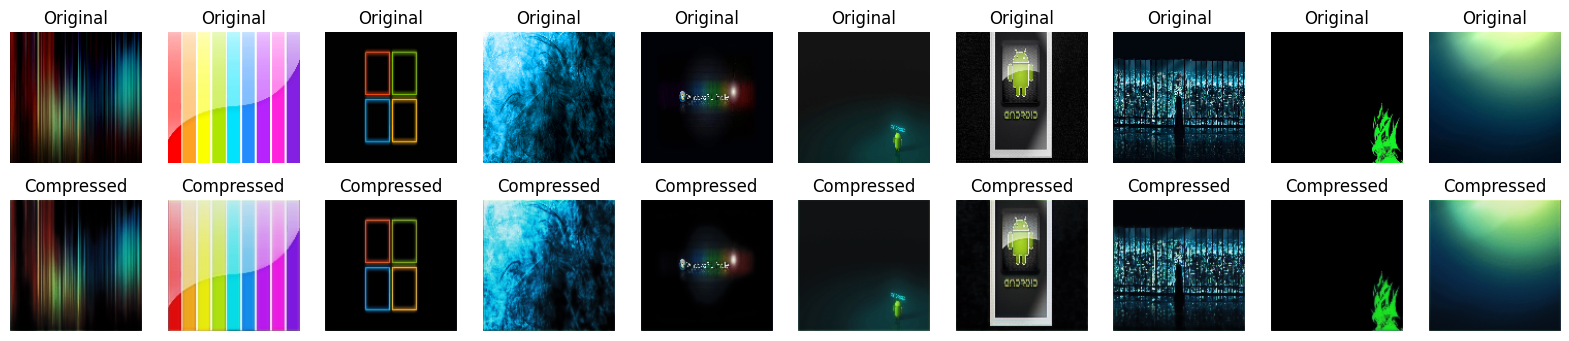

In [11]:
display_images(test_images, compressed_images)